Testing a Potential Moderator (Confounder) in between the response variable life expectancy and the explanatory variable internet user rate for different countries from the GapMinder dataset
------------------------------------------------------------------------------------------------------------------------

First, a *correlation analysis* was conducted on the *GapMinder* dataset to understand the association of 14 explanatory variables (including income per person, alcohol consumption, armed forces rate, breast cancer per 100th, co2 emissions, female employment rate, hiv rate, internet use rate, oil per person, polity score, relectric per person, suicide per 100th, employment rate, urbanization rate) with the variable *life expectancy*.

After removing the obeservations with missing values the pearson correlation coefficient is computed. As can be seen from the below results, the variable *internetuserate* has a strong positive correlation (with correlation coefficient ~ 0.77 and significant at 1% level, with a very low p-value) with the variable *life expectancy*. 

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

In [1]:
import pandas
import numpy as np
import seaborn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

data = pandas.read_csv('C:\\courses\\Coursera\\Current\\Data Analysis Tools\\Week3\\gapminder.csv')
data = data.drop('country', 1)
data = data.convert_objects(convert_numeric=True) #.dtypes
data = data.replace(' ', np.nan)
data_clean = data.dropna()

xvars = ['incomeperperson','alcconsumption','armedforcesrate', \
                     'breastcancerper100th','co2emissions','femaleemployrate','hivrate',  \
                     'internetuserate','oilperperson','polityscore','relectricperperson', \
                     'suicideper100th','employrate','urbanrate']

#data_clean.describe()

In [2]:
df = pandas.DataFrame(data=np.array(scipy.stats.pearsonr(data_clean[xvars[0]], data_clean['lifeexpectancy']))).T #, columns=['r','p'])
for xvar in xvars[1:]:
    df = df.append(pandas.DataFrame(data=np.array(scipy.stats.pearsonr(data_clean[xvar], data_clean['lifeexpectancy']))).T)
df.columns = ['pearson-r', 'p-value']
df.insert(0, 'variables', xvars)
df = df.sort(['pearson-r'])
#print(df)
#seaborn.lmplot(x="incomeperperson", y="lifeexpectancy", hue="internetuserate", data=data_clean, markers=["o", "x"], palette="Set1");
plt.figure();
print(df) # df.tail()

              variables  pearson-r       p-value
0               hivrate  -0.542506  1.566318e-05
0       suicideper100th  -0.218335  1.059663e-01
0       armedforcesrate   0.023648  8.626540e-01
0          co2emissions   0.103990  4.456349e-01
0            employrate   0.210334  1.197189e-01
0        alcconsumption   0.218541  1.056298e-01
0      femaleemployrate   0.268129  4.571763e-02
0           polityscore   0.344843  9.248381e-03
0          oilperperson   0.422911  1.165352e-03
0    relectricperperson   0.551581  1.052532e-05
0             urbanrate   0.552084  1.029253e-05
0  breastcancerper100th   0.580247  2.769328e-06
0       incomeperperson   0.732452  1.400123e-10
0       internetuserate   0.769160  4.381504e-12


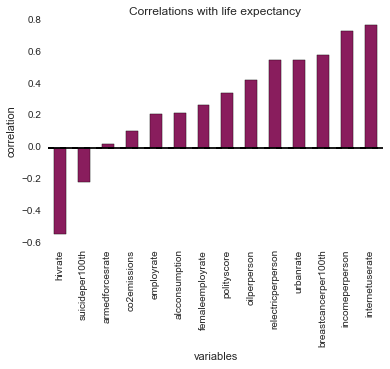

In [3]:
df['pearson-r'].plot(kind='bar'); 
plt.axhline(0, color='k')
ax = df['pearson-r'].plot(kind='bar', colormap="Spectral", stacked=False, title="Correlations with life expectancy", alpha=0.75, rot=90)
ax.set_xlabel("variables")
ax.set_ylabel("correlation")
ax.set_xticks(range(0, len(xvars)), minor=False)
ax.set_xticklabels(df.variables.tolist(), rotation=90, minor=False)
#ax.legend(['pos', 'neg'], loc='upper right')
plt.show()

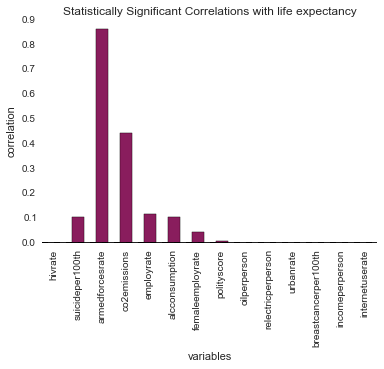

In [4]:
plt.figure();
#print(df.head())
df['p-value'].plot(kind='bar'); 
plt.axhline(0, color='k')
ax = df['p-value'].plot(kind='bar', colormap="Spectral", stacked=False, title="Statistically Significant Correlations with life expectancy", alpha=0.75, rot=90)
ax.set_xlabel("variables")
ax.set_ylabel("correlation")
ax.set_xticks(range(0, len(xvars)), minor=False)
ax.set_xticklabels(df.variables.tolist(), rotation=90, minor=False)
#ax.legend(['pos', 'neg'], loc='upper right')
plt.show()

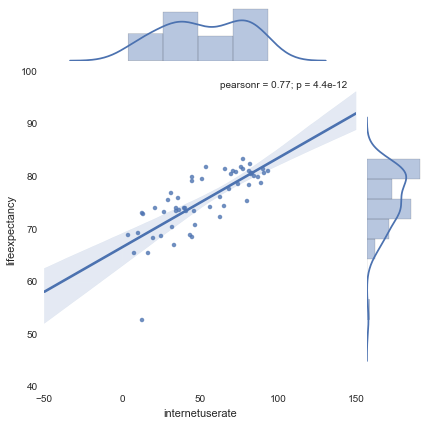

In [5]:
seaborn.jointplot(x="internetuserate", y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

### Analysis 1 (with correlation coefficient)
We want to answer the following question: does the variable *income per person* **moderate** the relationship between the qunatitative explanatory variable *internet use rate* and the quantitative response variable *life expectancy*? To answer this, the income per person variable was partitioned into **4 groups** (LOW, MID, HIGH, VERY HIGH) using the quartiles as shown below, after removing the NA values.

In [6]:
print(data_clean['incomeperperson'].describe())

def incomegrp (row):
   if row['incomeperperson'] <= 2532.598585:
      return 1
   elif row['incomeperperson'] <= 6219.692968 :
      return 2
   elif row['incomeperperson'] <= 25373.478550:
      return 3
   else: 
      return 4
   
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)

chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
#print(chk1)

sub1=data_clean[(data_clean['incomegrp']== 1)]
sub2=data_clean[(data_clean['incomegrp']== 2)]
sub3=data_clean[(data_clean['incomegrp']== 3)]
sub4=data_clean[(data_clean['incomegrp']== 4)]

print ('       ')
print ('association between internetuserate and lifeexpectancy for LOW income countries')
print (scipy.stats.pearsonr(sub1['internetuserate'], sub1['lifeexpectancy']))
print ('       ')
print ('association between internetuserate and lifeexpectancy for MIDDLE income countries')
print (scipy.stats.pearsonr(sub2['internetuserate'], sub2['lifeexpectancy']))
print ('       ')
print ('association between internetuserate and lifeexpectancy for HIGH income countries')
print (scipy.stats.pearsonr(sub3['internetuserate'], sub3['lifeexpectancy']))
print ('       ')
print ('association between internetuserate and lifeexpectancy for VERY HIGH income countries')
print (scipy.stats.pearsonr(sub4['internetuserate'], sub4['lifeexpectancy']))
print ('       ')

count       56.000000
mean     12982.654643
std      12712.681024
min        558.062877
25%       2532.598585
50%       6219.692968
75%      25373.478550
max      39972.352768
Name: incomeperperson, dtype: float64
       
association between internetuserate and lifeexpectancy for LOW income countries
(0.19318865715608682, 0.50814385277502172)
       
association between internetuserate and lifeexpectancy for MIDDLE income countries
(0.49179543859770558, 0.07407099884980306)
       
association between internetuserate and lifeexpectancy for HIGH income countries
(0.26833836982846088, 0.35361855231884515)
       
association between internetuserate and lifeexpectancy for VERY HIGH income countries
(-0.039209951767063364, 0.8941289102621256)
       


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


As can be seen from the below scatterplots for different income groups, the income groups LOW, MID and HIGH appears to have somewhat positive corrletaion in between the variables *internet user rate* and *life expectancy* (altough none of them statisticallly significant at 5% level), but the income group VERY HIGH almost have no correlation (very weak negative correlation). It implies that the variable *income per person* moderates the relation in between *internet user rate* and *life expectancy* significantly.

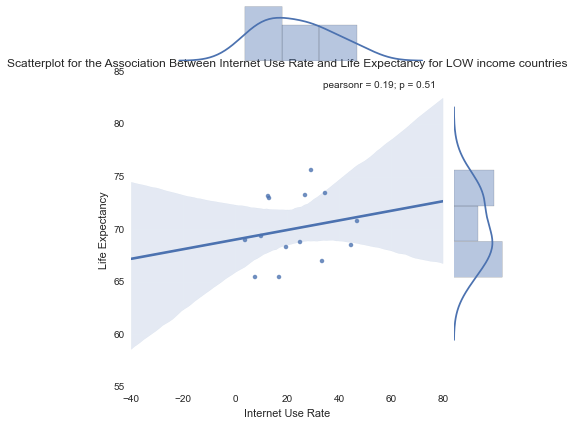

In [7]:
#%%
scat1 = seaborn.jointplot(x="internetuserate", y="lifeexpectancy", data=sub1, kind="reg", stat_func=scipy.stats.pearsonr)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Internet Use Rate and Life Expectancy for LOW income countries')
print (scat1)

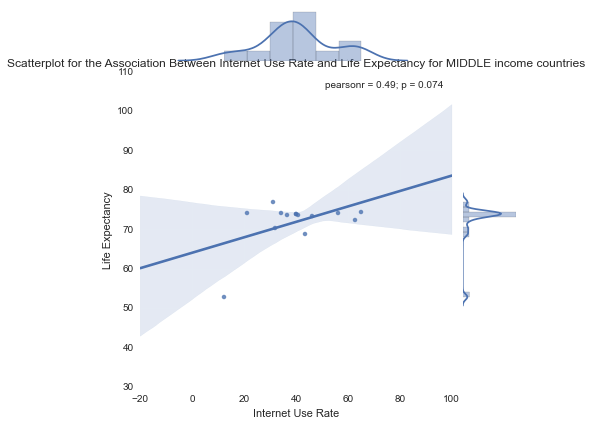

In [8]:
#%%
scat2 = seaborn.jointplot(x="internetuserate", y="lifeexpectancy", data=sub2, kind="reg", stat_func=scipy.stats.pearsonr)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Internet Use Rate and Life Expectancy for MIDDLE income countries')
print (scat2)

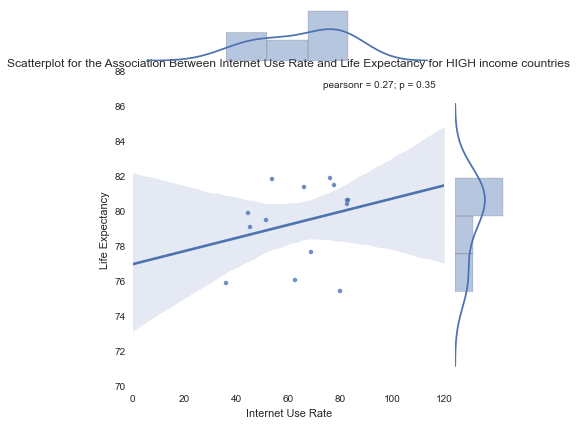

In [9]:
#%%
scat3 = seaborn.jointplot(x="internetuserate", y="lifeexpectancy", data=sub3, kind="reg", stat_func=scipy.stats.pearsonr)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Internet Use Rate and Life Expectancy for HIGH income countries')
print (scat3)

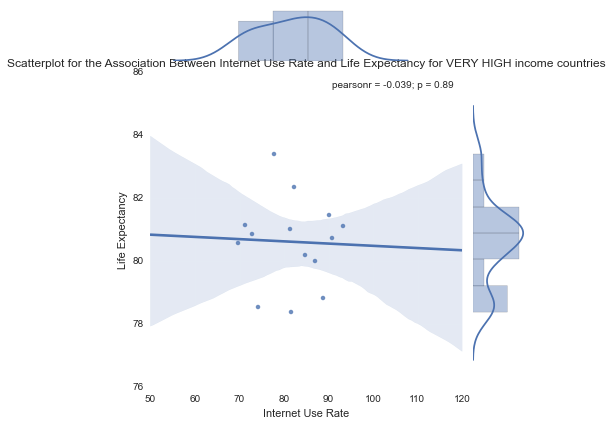

In [10]:
#%%
scat4 = seaborn.jointplot(x="internetuserate", y="lifeexpectancy", data=sub4, kind="reg", stat_func=scipy.stats.pearsonr)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Internet Use Rate and Life Expectancy for VERY HIGH income countries')
print (scat4)

### Analysis 2 (with one-way ANOVA)
As a preprocessing step, let's first convert the quantitative explanatory variable *internet use rate* to a categoriecal variable by dividing it into **2 groups**: 1=LOW (below 50%) and 2=HIGH (otherwise). Then we shall use one-way ANOVA to find whether the association between the categorical explanatory variable *internet use rate* and the quantitative response variable *life expectancy* is significant and also compute mean *life expectancy* for the *internet use rate* groups. As can be seen, the relationship in between these two variables was found to be statistically significant at 5% level (with low *p-value* and *F-statistic* 52.11).

In [11]:
print(data_clean['internetuserate'].describe())

def internetuserategrp (row):
   return 1 if row['internetuserate'] <= 50 else 2
    
data_clean['internetuserate'] = data_clean.apply (lambda row: internetuserategrp(row),axis=1)
#print(data_clean['internetuserate'].describe())

count    56.000000
mean     52.464245
std      26.218205
min       3.700003
25%      33.049632
50%      48.980090
75%      77.533598
max      93.277508
Name: internetuserate, dtype: float64


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     52.11
Date:                Tue, 01 Mar 2016   Prob (F-statistic):           1.82e-09
Time:                        13:33:22   Log-Likelihood:                -158.36
No. Observations:                  56   AIC:                             320.7
Df Residuals:                      54   BIC:                             324.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

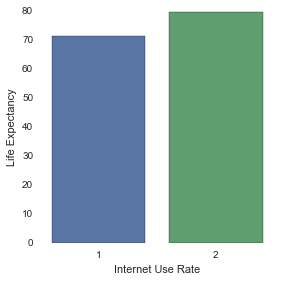

In [12]:
import statsmodels.formula.api as smf 

model1 = smf.ols(formula='lifeexpectancy ~ C(internetuserate)', data=data_clean).fit()
print (model1.summary())

sub1 = data_clean[['lifeexpectancy', 'internetuserate']]

print ("means for lifeexpectancy by internetuserate LOW vs. HIGH")
m1= sub1.groupby('internetuserate').mean()
print (m1)

print ("standard deviation for mean lifeexpectancy by internetuserate LOW vs. HIGH")
st1= sub1.groupby('internetuserate').std()
print (st1)

# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=data_clean, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')

Now, we want to answer the following question: does the variable *income per person* **moderate** the relationship between the (converted) categorical explanatory variable *internet use rate* and the quantitative response variable *life expectancy*? To answer this, the income per person variable was partitioned into **2 groups** (LOW=1, HIGH=2) using the median, after removing the NA values. Then one-way ANOVA test (and Tukey post-hoc test) was conducted on each of the groups. As can be seen, the association between the categorical explanatory variable *internet use rate* and the quantitative response variable *life expectancy* is not significant inside both the income groups, which implies that the variable *income per person* **moderates** the relationship.

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.070
Date:                Tue, 01 Mar 2016   Prob (F-statistic):              0.311
Time:                        13:33:22   Log-Likelihood:                -81.965
No. Observations:                  28   AIC:                             167.9
Df Residuals:                      26   BIC:                             170.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


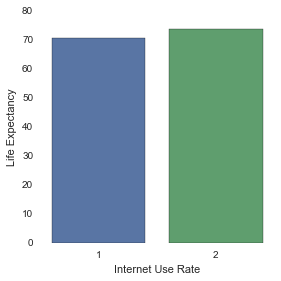

In [13]:
def incomegrp (row):
   if row['incomeperperson'] <= 6219.692968 :
      return 1
   else: 
      return 2
   
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)

sub1 = data_clean[data_clean['incomegrp']==1][['lifeexpectancy', 'internetuserate']]
model1 = smf.ols(formula='lifeexpectancy ~ C(internetuserate)', data=sub1).fit()
print (model1.summary())

print ('means for lifeexpectancy by internetuserate')
m1= sub1.groupby('internetuserate').mean()
print (m1)

print ('standard deviations for lifeexpectancy by internetuserate')
sd1 = sub1.groupby('internetuserate').std()
print (sd1)

# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=sub1, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')

In [14]:
import statsmodels.stats.multicomp as multi
mc1 = multi.MultiComparison(sub1['lifeexpectancy'], sub1['internetuserate'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper reject
-------------------------------------------
  1      2     2.9637  -2.9266 8.854 False 
-------------------------------------------


                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.769
Date:                Tue, 01 Mar 2016   Prob (F-statistic):              0.108
Time:                        13:33:23   Log-Likelihood:                -56.372
No. Observations:                  28   AIC:                             116.7
Df Residuals:                      26   BIC:                             119.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

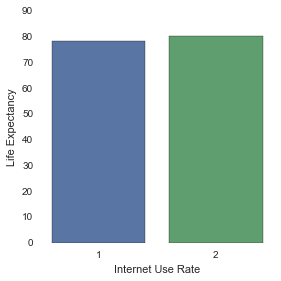

In [15]:
sub2 = data_clean[data_clean['incomegrp']==2][['lifeexpectancy', 'internetuserate']]
model2 = smf.ols(formula='lifeexpectancy ~ C(internetuserate)', data=sub2).fit()
print (model2.summary())

print ('means for lifeexpectancy by incomegrp')
m2= sub2.groupby('internetuserate').mean()
print (m2)

print ('standard deviations for lifeexpectancy by incomegrp')
sd2 = sub2.groupby('internetuserate').std()
print (sd2)

# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=sub2, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')

In [16]:
mc2 = multi.MultiComparison(sub2['lifeexpectancy'], sub2['internetuserate'])
res2 = mc2.tukeyhsd()
print(res2.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     1.9119  -0.4496 4.2734 False 
--------------------------------------------


###Analysis 3 (with $\chi^2$ test for independence)

Let's carry out the following *preprocessing steps* first:
* Convert the quantitative explanatory variable *internet use rate* to a categoriecal variable by splitting it into 2 groups: 1=LOW (below 50%), 2=HIGH (otherwise).
* Convert the quantitative response variable *life expectancy* to a categoriecal variable by splitting it into 2 groups: 1=LOW (below 50 years) and 2=HIGH (otherwise). 

Then we shall $\chi^2$ test for *independence* to find whether there is a statistically significant association between the categorical explanatory variable *internet use rate* and the categorical response variable *life expectancy*. As can be seen, the relationship in between these two variables was found to be statistically significant at 5% level (with low p-value and F-statistic 52.11).

In [17]:
data = pandas.read_csv('C:\\courses\\Coursera\\Current\\Data Analysis Tools\\Week3\\gapminder.csv')
data = data.drop('country', 1)
data = data.convert_objects(convert_numeric=True) #.dtypes
data = data.replace(' ', np.nan)
data_clean = data.dropna()

xvars = ['incomeperperson','alcconsumption','armedforcesrate', \
                     'breastcancerper100th','co2emissions','femaleemployrate','hivrate',  \
                     'internetuserate','oilperperson','polityscore','relectricperperson', \
                     'suicideper100th','employrate','urbanrate']


def incomegrp (row):
   if row['incomeperperson'] <= 6219.692968 :
      return 1
   else: 
      return 2
   
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)

print(data_clean['internetuserate'].describe())

def internetuserategrp (row):
   if row['internetuserate'] <= 50:
      return 1
   else:
      return 2
 
data_clean['internetuserate'] = data_clean.apply (lambda row: internetuserategrp(row),axis=1)

#print(data_clean['lifeexpectancy'].describe())

def lifeexpectancygrp (row):
   if row['lifeexpectancy'] <= 70:
      return 1
   else:
      return 2
    
data_clean['lifeexpectancy'] = data_clean.apply (lambda row: lifeexpectancygrp(row),axis=1)
#print(data_clean['lifeexpectancy'].describe())

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    56.000000
mean     52.464245
std      26.218205
min       3.700003
25%      33.049632
50%      48.980090
75%      77.533598
max      93.277508
Name: internetuserate, dtype: float64


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


lifeexpectancy    1   2
internetuserate        
1                10  18
2                 0  28
lifeexpectancy   1         2
internetuserate             
1                1  0.391304
2                0  0.608696
chi-square value, p value, expected counts
(9.8608695652173903, 0.0016883128833979316, 1, array([[  5.,  23.],
       [  5.,  23.]]))


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


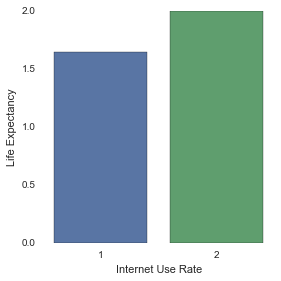

In [18]:
# contingency table of observed counts
ct1=pandas.crosstab(data_clean['internetuserate'], data_clean['lifeexpectancy'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

# set variable types 
data_clean["internetuserate"] = data_clean["internetuserate"].astype('category')

# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=data_clean, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')

Now, we want to answer the following question: does the variable *income per person* moderate the relationship between the (converted) categorical explanatory variable *internet use rate* and the (converted) categorical response variable *life expectancy*? To answer this, the *income per person* variable was partitioned into 2 groups (LOW=1, HIGH=2) using the median, after removing the NA values. Then the $\chi^2$ test for independence was conducted on each of the groups. As can be seen, the association between the categorical explanatory variable internet use rate and the quantitative response variable life expectancy is not significant inside both the income groups, which implies that the variable income per person moderates the relationship.

lifeexpectancy    1   2
internetuserate        
1                10  15
2                 0   3
lifeexpectancy   1         2
internetuserate             
1                1  0.833333
2                0  0.166667
chi-square value, p value, expected counts
(0.53096296296296297, 0.46620229103472399, 1, array([[  8.92857143,  16.07142857],
       [  1.07142857,   1.92857143]]))


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


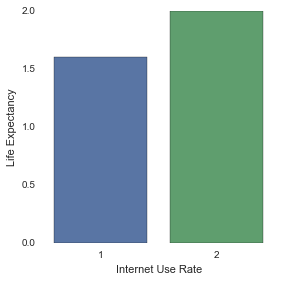

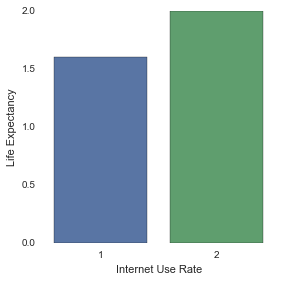

In [19]:
sub1=data_clean[(data_clean['incomegrp']== 1)]
# contingency table of observed counts
ct1=pandas.crosstab(sub1['internetuserate'], sub1['lifeexpectancy'])
print (ct1)
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)
# set variable types 
sub1["internetuserate"] = sub1["internetuserate"].astype('category')
# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=sub1, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')
# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=sub1, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')

lifeexpectancy    2
internetuserate    
1                 3
2                25
lifeexpectancy          2
internetuserate          
1                0.107143
2                0.892857
chi-square value, p value, expected counts
(0.0, 1.0, 0, array([[  3.],
       [ 25.]]))


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


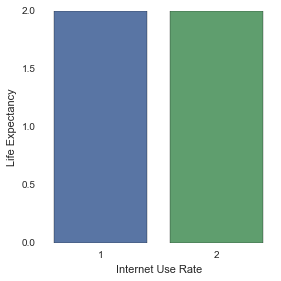

In [20]:
sub2=data_clean[(data_clean['incomegrp']== 2)]
# contingency table of observed counts
ct2=pandas.crosstab(sub2['internetuserate'], sub2['lifeexpectancy'])
print (ct2)
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)
# chi-square
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)
# set variable types 
sub2["internetuserate"] = sub2["internetuserate"].astype('category')
# bivariate bar graph
seaborn.factorplot(x="internetuserate", y="lifeexpectancy", data=sub2, kind="bar", ci=None)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')